In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

# Load data
file = "Cutting Forces in Turning.xlsx"
data = pd.read_excel(file)

# Define inputs and outputs
X = data[['Spindle Speed', 'Feed', 'Depth of Cut']].values
y_fx = data['Fx'].values
y_fy = data['Fy'].values
y_fz = data['Fz'].values

# Split the data into training and testing sets
X_train, X_test, y_fx_train, y_fx_test = train_test_split(X, y_fx, test_size=0.2, random_state=42)
_, _, y_fy_train, y_fy_test = train_test_split(X, y_fy, test_size=0.2, random_state=42)
_, _, y_fz_train, y_fz_test = train_test_split(X, y_fz, test_size=0.2, random_state=42)

# Standardize the input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Function to create and compile the model
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=3, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Create and train the model for Fx
model_fx = create_model()
model_fx.fit(X_train, y_fx_train, epochs=100, batch_size=10, validation_split=0.2)

# Create and train the model for Fy
model_fy = create_model()
model_fy.fit(X_train, y_fy_train, epochs=200, batch_size=10, validation_split=0.2)

# Create and train the model for Fz
model_fz = create_model()
model_fz.fit(X_train, y_fz_train, epochs=200, batch_size=10, validation_split=0.2)

# Evaluate the models
loss_fx = model_fx.evaluate(X_test, y_fx_test)
loss_fy = model_fy.evaluate(X_test, y_fy_test)
loss_fz = model_fz.evaluate(X_test, y_fz_test)

print(f'Loss for Fx model: {loss_fx}')
print(f'Loss for Fy model: {loss_fy}')
print(f'Loss for Fz model: {loss_fz}')

# Function to predict outputs for a new input
def predict_new_input(new_input):
    new_input_scaled = scaler.transform([new_input])
    pred_fx = model_fx.predict(new_input_scaled)[0][0]
    pred_fy = model_fy.predict(new_input_scaled)[0][0]
    pred_fz = model_fz.predict(new_input_scaled)[0][0]
    return pred_fx, pred_fy, pred_fz

# Example of predicting a new input
new_input = [500, 0.3, 0.7]  # Example new input data
predicted_fx, predicted_fy, predicted_fz = predict_new_input(new_input)

print(f'Predicted Fx: {predicted_fx}')
print(f'Predicted Fy: {predicted_fy}')
print(f'Predicted Fz: {predicted_fz}')


C:\Users\91837\AppData\Roaming\Python\Python39\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (2.2.1) or chardet (None)/charset_normalizer (2.0.7) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


Epoch 1/100
2/2 [==============================] - 1s 328ms/step - loss: 72.6428 - val_loss: 61.8160
Epoch 2/100
2/2 [==============================] - 0s 45ms/step - loss: 70.8634 - val_loss: 60.4437
Epoch 3/100
2/2 [==============================] - 0s 34ms/step - loss: 69.2255 - val_loss: 59.1258
Epoch 4/100
2/2 [==============================] - 0s 41ms/step - loss: 67.4184 - val_loss: 57.7733
Epoch 5/100
2/2 [==============================] - 0s 45ms/step - loss: 64.8713 - val_loss: 56.3534
Epoch 6/100
2/2 [==============================] - 0s 43ms/step - loss: 63.4423 - val_loss: 54.7917
Epoch 7/100
2/2 [==============================] - 0s 38ms/step - loss: 61.4495 - val_loss: 53.1200
Epoch 8/100
2/2 [==============================] - 0s 41ms/step - loss: 59.6125 - val_loss: 51.2687
Epoch 9/100
2/2 [==============================] - 0s 36ms/step - loss: 57.6728 - val_loss: 49.2768
Epoch 10/100
2/2 [==============================] - 0s 35ms/step - loss: 53.5891 - val_loss: 47.086

2/2 [==============================] - 0s 39ms/step - loss: 3.0854 - val_loss: 3.1349
Epoch 84/100
2/2 [==============================] - 0s 49ms/step - loss: 1.7428 - val_loss: 3.1764
Epoch 85/100
2/2 [==============================] - 0s 46ms/step - loss: 2.0383 - val_loss: 3.2603
Epoch 86/100
2/2 [==============================] - 0s 49ms/step - loss: 1.5430 - val_loss: 3.2778
Epoch 87/100
2/2 [==============================] - 0s 49ms/step - loss: 1.0775 - val_loss: 3.2152
Epoch 88/100
2/2 [==============================] - 0s 41ms/step - loss: 3.2499 - val_loss: 3.2958
Epoch 89/100
2/2 [==============================] - 0s 43ms/step - loss: 2.0196 - val_loss: 3.5413
Epoch 90/100
2/2 [==============================] - 0s 50ms/step - loss: 1.7160 - val_loss: 3.8602
Epoch 91/100
2/2 [==============================] - 0s 48ms/step - loss: 1.8128 - val_loss: 4.1608
Epoch 92/100
2/2 [==============================] - 0s 49ms/step - loss: 1.9471 - val_loss: 4.2883
Epoch 93/100
2/2 [=====

Epoch 63/200
2/2 [==============================] - 0s 33ms/step - loss: 49.8464 - val_loss: 59.9285
Epoch 64/200
2/2 [==============================] - 0s 37ms/step - loss: 55.6941 - val_loss: 63.5813
Epoch 65/200
2/2 [==============================] - 0s 33ms/step - loss: 80.9401 - val_loss: 67.9416
Epoch 66/200
2/2 [==============================] - 0s 39ms/step - loss: 120.8822 - val_loss: 70.5369
Epoch 67/200
2/2 [==============================] - 0s 41ms/step - loss: 41.9301 - val_loss: 73.7371
Epoch 68/200
2/2 [==============================] - 0s 37ms/step - loss: 45.7575 - val_loss: 77.0181
Epoch 69/200
2/2 [==============================] - 0s 43ms/step - loss: 44.0522 - val_loss: 79.7619
Epoch 70/200
2/2 [==============================] - 0s 38ms/step - loss: 41.8165 - val_loss: 81.7071
Epoch 71/200
2/2 [==============================] - 0s 42ms/step - loss: 45.4492 - val_loss: 81.0872
Epoch 72/200
2/2 [==============================] - 0s 49ms/step - loss: 85.8795 - val_los

2/2 [==============================] - 0s 42ms/step - loss: 46.3840 - val_loss: 55.1882
Epoch 144/200
2/2 [==============================] - 0s 48ms/step - loss: 50.2955 - val_loss: 55.0848
Epoch 145/200
2/2 [==============================] - 0s 42ms/step - loss: 51.1000 - val_loss: 53.3549
Epoch 146/200
2/2 [==============================] - 0s 46ms/step - loss: 52.4032 - val_loss: 52.1795
Epoch 147/200
2/2 [==============================] - 0s 48ms/step - loss: 59.5481 - val_loss: 48.9614
Epoch 148/200
2/2 [==============================] - 0s 41ms/step - loss: 59.6098 - val_loss: 48.9288
Epoch 149/200
2/2 [==============================] - 0s 40ms/step - loss: 52.8058 - val_loss: 51.7084
Epoch 150/200
2/2 [==============================] - 0s 51ms/step - loss: 30.2378 - val_loss: 55.4905
Epoch 151/200
2/2 [==============================] - 0s 49ms/step - loss: 51.6623 - val_loss: 61.8036
Epoch 152/200
2/2 [==============================] - ETA: 0s - loss: 30.82 - 0s 36ms/step - loss

2/2 [==============================] - 0s 40ms/step - loss: 326.1095 - val_loss: 388.4749
Epoch 24/200
2/2 [==============================] - 0s 52ms/step - loss: 314.7992 - val_loss: 361.4905
Epoch 25/200
2/2 [==============================] - 0s 49ms/step - loss: 266.8025 - val_loss: 333.6728
Epoch 26/200
2/2 [==============================] - 0s 44ms/step - loss: 254.0008 - val_loss: 304.9628
Epoch 27/200
2/2 [==============================] - 0s 49ms/step - loss: 210.3963 - val_loss: 276.1426
Epoch 28/200
2/2 [==============================] - 0s 46ms/step - loss: 180.8638 - val_loss: 247.0055
Epoch 29/200
2/2 [==============================] - 0s 45ms/step - loss: 171.6661 - val_loss: 217.1635
Epoch 30/200
2/2 [==============================] - 0s 49ms/step - loss: 155.6833 - val_loss: 188.2585
Epoch 31/200
2/2 [==============================] - 0s 49ms/step - loss: 131.5803 - val_loss: 161.2793
Epoch 32/200
2/2 [==============================] - 0s 48ms/step - loss: 102.8326 - va

2/2 [==============================] - 0s 40ms/step - loss: 18.0841 - val_loss: 40.2101
Epoch 104/200
2/2 [==============================] - 0s 50ms/step - loss: 12.9751 - val_loss: 40.3287
Epoch 105/200
2/2 [==============================] - 0s 41ms/step - loss: 9.6940 - val_loss: 40.6057
Epoch 106/200
2/2 [==============================] - 0s 50ms/step - loss: 10.3785 - val_loss: 40.9054
Epoch 107/200
2/2 [==============================] - 0s 49ms/step - loss: 15.8326 - val_loss: 40.7838
Epoch 108/200
2/2 [==============================] - 0s 42ms/step - loss: 15.5241 - val_loss: 40.6954
Epoch 109/200
2/2 [==============================] - 0s 41ms/step - loss: 20.8264 - val_loss: 40.9883
Epoch 110/200
2/2 [==============================] - 0s 40ms/step - loss: 17.2469 - val_loss: 41.1576
Epoch 111/200
2/2 [==============================] - 0s 41ms/step - loss: 14.0864 - val_loss: 41.4560
Epoch 112/200
2/2 [==============================] - 0s 44ms/step - loss: 12.1432 - val_loss: 41.

2/2 [==============================] - 0s 74ms/step - loss: 14.6111 - val_loss: 39.8797
Epoch 184/200
2/2 [==============================] - 0s 57ms/step - loss: 7.0625 - val_loss: 39.4528
Epoch 185/200
2/2 [==============================] - 0s 52ms/step - loss: 11.8960 - val_loss: 39.4145
Epoch 186/200
2/2 [==============================] - 0s 50ms/step - loss: 13.9958 - val_loss: 40.0033
Epoch 187/200
2/2 [==============================] - 0s 57ms/step - loss: 4.7330 - val_loss: 40.2728
Epoch 188/200
2/2 [==============================] - 0s 49ms/step - loss: 9.6793 - val_loss: 40.4470
Epoch 189/200
2/2 [==============================] - 0s 49ms/step - loss: 12.1201 - val_loss: 39.7796
Epoch 190/200
2/2 [==============================] - 0s 53ms/step - loss: 10.3637 - val_loss: 39.3328
Epoch 191/200
2/2 [==============================] - 0s 50ms/step - loss: 13.4414 - val_loss: 39.3083
Epoch 192/200
2/2 [==============================] - 0s 49ms/step - loss: 10.5530 - val_loss: 39.54

1.3963876605033874 4.4295957565307615 3.383882522583008


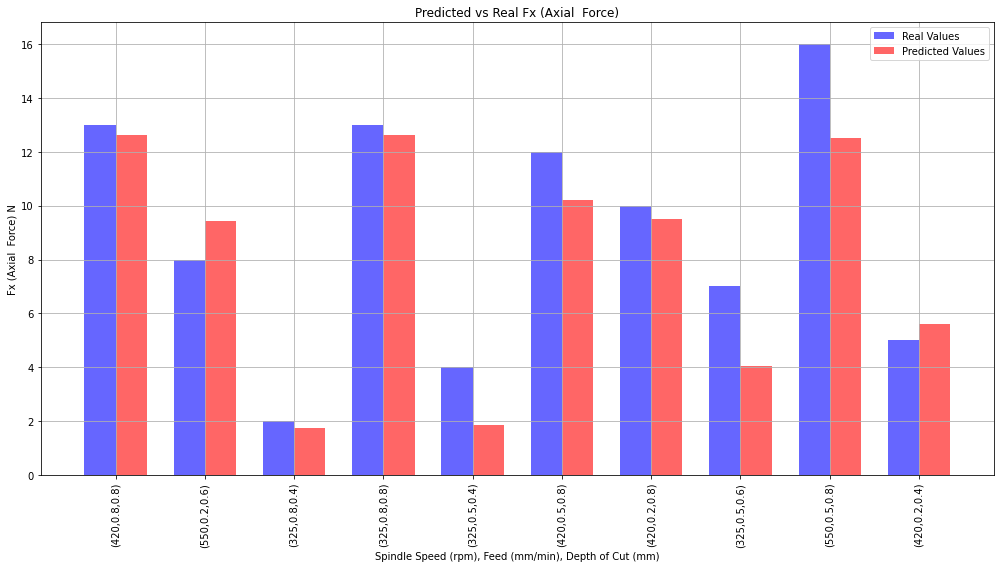

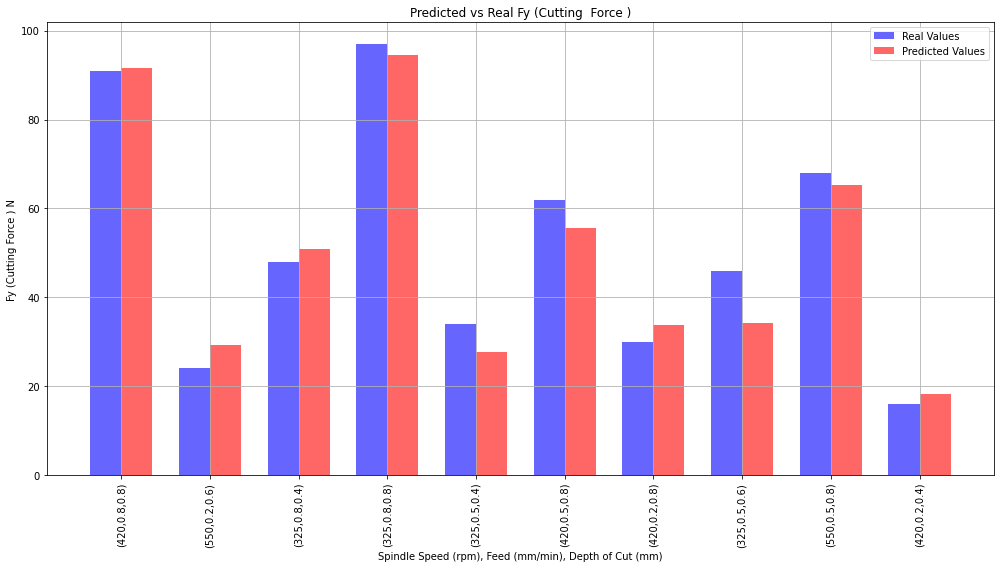

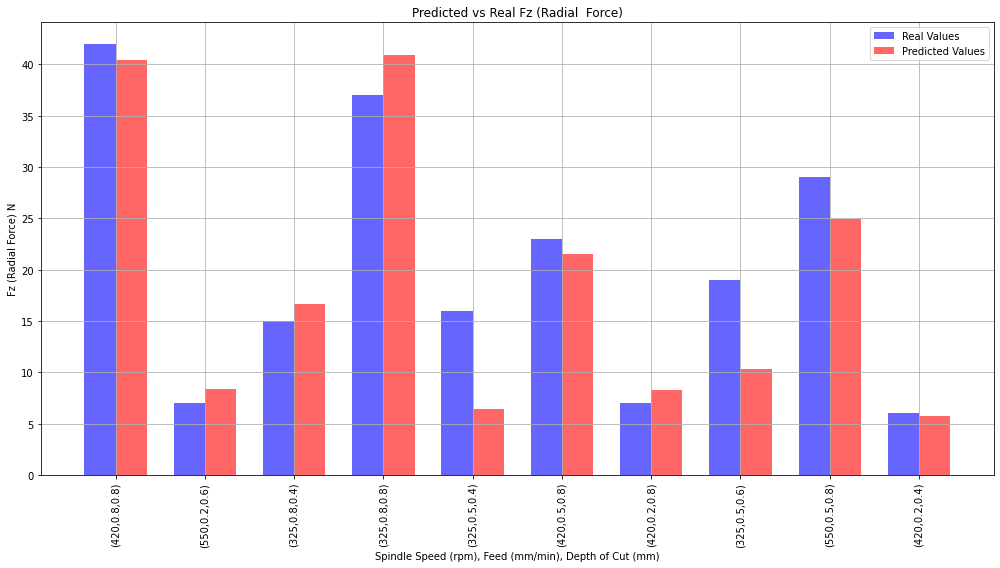

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

file = "Cutting Forces in Turning.xlsx"
data = pd.read_excel(file)

speed = data["Spindle Speed"]
feed = data["Feed"]
doc = data["Depth of Cut"]
y_fx_pred = []
y_fy_pred = []
y_fz_pred = []
y_fx_test = []
y_fy_test = []
y_fz_test = []

avgx,avgy,avgz=0,0,0
for i in range(3, 13):
    y_fx_test.append(data["Fx"][i])
    y_fy_test.append(data["Fy"][i])
    y_fz_test.append(data["Fz"][i])
    p = predict_new_input([speed[i], feed[i], doc[i]])
    # Predict values for the test set
    y_fx_pred.append(p[0])
    y_fy_pred.append(p[1])
    y_fz_pred.append(p[2])
    avgx+=abs(data["Fx"][i]-p[0])
    avgy+=abs(data["Fy"][i]-p[1])
    avgz+=abs(data["Fz"][i]-p[2])
    
print(avgx/10,avgy/10,avgz/10)

# Create custom x-axis labels with (Spindle Speed, Feed, Depth of Cut)
x_labels = [f'({speed[i]},{feed[i]},{doc[i]})' for i in range(3, 13)]
x = np.arange(len(x_labels))

# Function to plot predicted vs real values as a bar graph
def plot_pred_vs_real_bar(y_test, y_pred, title, ylabel):
    width = 0.35  # width of the bars
    fig, ax = plt.subplots(figsize=(14, 8))

    # Plot bars
    ax.bar(x - width/2, y_test, width, label='Real Values', color='blue', alpha=0.6)
    ax.bar(x + width/2, y_pred, width, label='Predicted Values', color='red', alpha=0.6)

    # Set labels and title
    ax.set_xlabel('Spindle Speed (rpm), Feed (mm/min), Depth of Cut (mm)')
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(x_labels, rotation=90)
    ax.legend()
    ax.grid(True)

    # Adjust layout to prevent clipping of tick-labels
    plt.tight_layout()
    plt.show()

# Plot for Fx
plot_pred_vs_real_bar(y_fx_test, y_fx_pred, 'Predicted vs Real Fx (Axial  Force)', 'Fx (Axial  Force) N')

# Plot for Fy
plot_pred_vs_real_bar(y_fy_test, y_fy_pred, 'Predicted vs Real Fy (Cutting  Force )', 'Fy (Cutting Force ) N')

# Plot for Fz
plot_pred_vs_real_bar(y_fz_test, y_fz_pred, 'Predicted vs Real Fz (Radial  Force)', 'Fz (Radial Force) N')


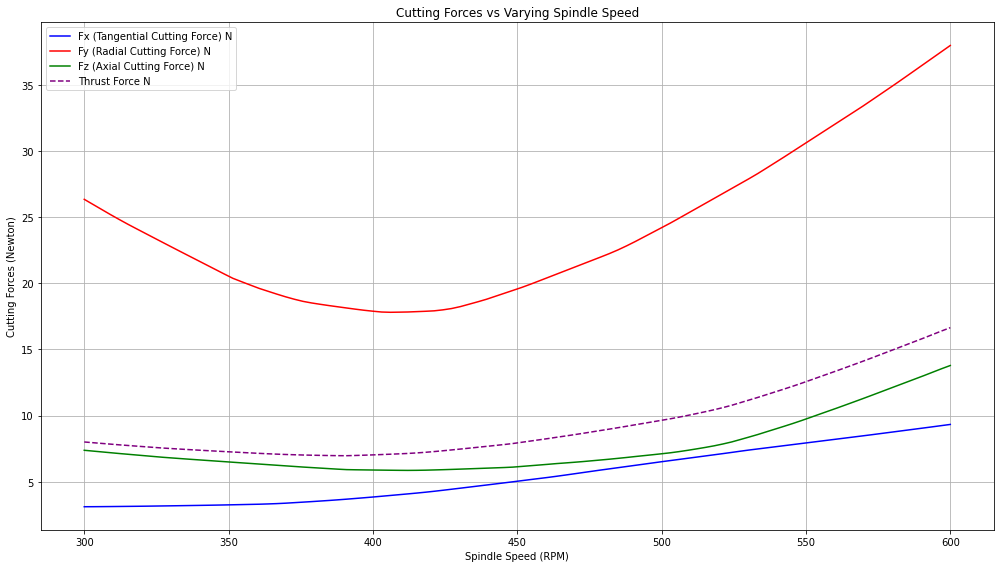

In [12]:
# Varying Spindle Speed (300 to 600) while keeping Feed (0.3) and Depth of Cut (0.4) constant
spindle_speeds = np.linspace(300, 600, 100)
feed_const = 0.3
doc_const = 0.4

fx_preds_speed = []
fy_preds_speed = []
fz_preds_speed = []
thrust_force_speed = []

for speed in spindle_speeds:
    p = predict_new_input([speed, feed_const, doc_const])
    fx_preds_speed.append(p[0])
    fy_preds_speed.append(p[1])
    fz_preds_speed.append(p[2])
    thrust_force_speed.append(np.sqrt(p[0]**2 + p[2]**2))  # Calculate thrust force

plt.figure(figsize=(14, 8))
plt.plot(spindle_speeds, fx_preds_speed, label='Fx (Tangential Cutting Force) N', color='blue')
plt.plot(spindle_speeds, fy_preds_speed, label='Fy (Radial Cutting Force) N', color='red')
plt.plot(spindle_speeds, fz_preds_speed, label='Fz (Axial Cutting Force) N', color='green')
plt.plot(spindle_speeds, thrust_force_speed, label='Thrust Force N', color='purple', linestyle='--')

plt.xlabel('Spindle Speed (RPM)')
plt.ylabel('Cutting Forces (Newton)')
plt.title('Cutting Forces vs Varying Spindle Speed')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

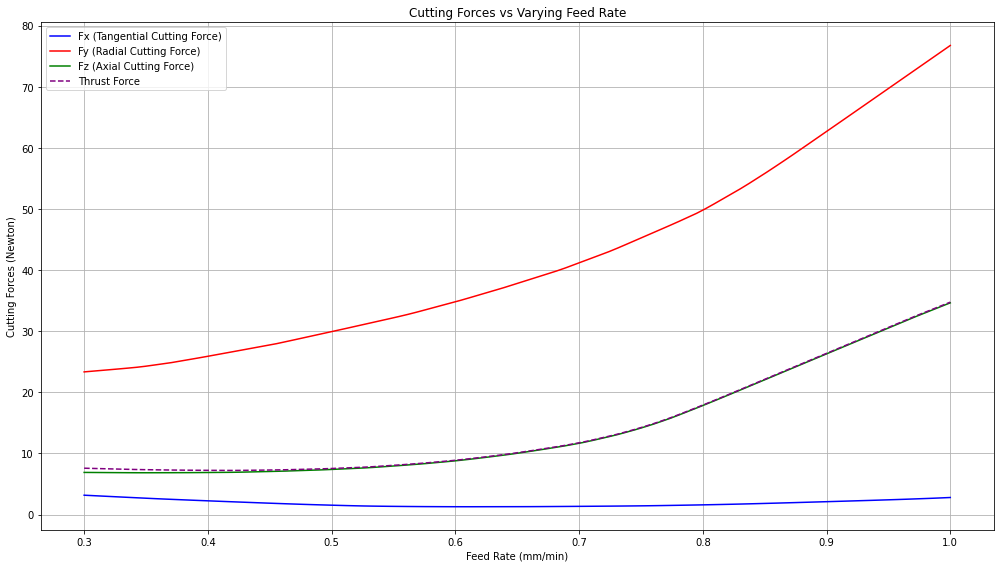

In [13]:
# Varying Feed (0.3 to 1) while keeping Spindle Speed (325) and Depth of Cut (0.4) constant
feed_rates = np.linspace(0.3, 1, 100)
speed_const = 325
doc_const = 0.4

fx_preds_feed = []
fy_preds_feed = []
fz_preds_feed = []
thrust_force_feed = []

for feed in feed_rates:
    p = predict_new_input([speed_const, feed, doc_const])
    fx_preds_feed.append(p[0])
    fy_preds_feed.append(p[1])
    fz_preds_feed.append(p[2])
    thrust_force_feed.append(np.sqrt(p[0]**2 + p[2]**2))  # Calculate thrust force

plt.figure(figsize=(14, 8))
plt.plot(feed_rates, fx_preds_feed, label='Fx (Tangential Cutting Force)', color='blue')
plt.plot(feed_rates, fy_preds_feed, label='Fy (Radial Cutting Force)', color='red')
plt.plot(feed_rates, fz_preds_feed, label='Fz (Axial Cutting Force)', color='green')
plt.plot(feed_rates, thrust_force_feed, label='Thrust Force', color='purple', linestyle='--')

plt.xlabel('Feed Rate (mm/min)')
plt.ylabel('Cutting Forces (Newton)')
plt.title('Cutting Forces vs Varying Feed Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


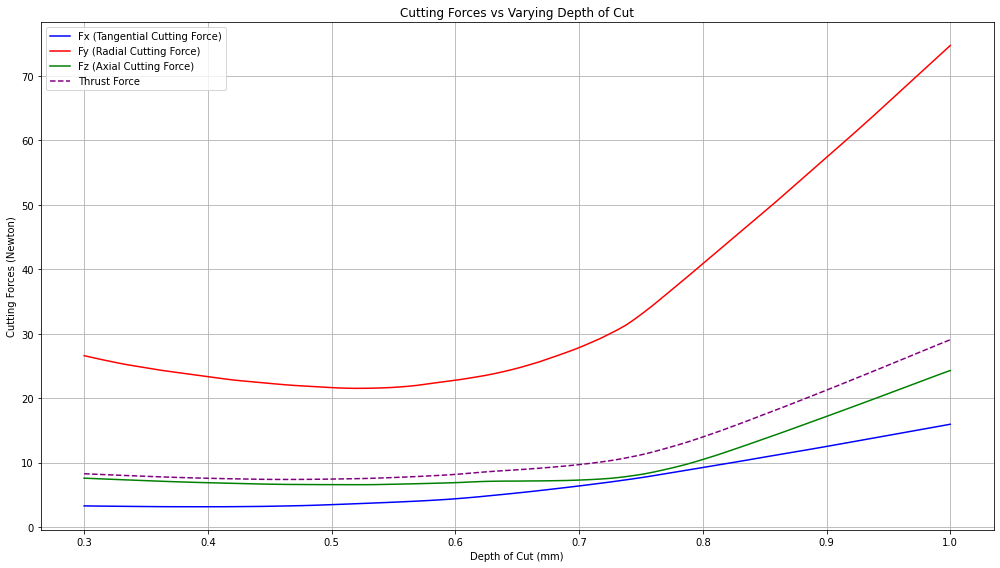

In [15]:
# Varying Depth of Cut (0.3 to 1) while keeping Spindle Speed (325) and Feed (0.3) constant
doc_rates = np.linspace(0.3, 1, 100)
speed_const = 325
feed_const = 0.3

fx_preds_doc = []
fy_preds_doc = []
fz_preds_doc = []
thrust_force_doc = []

for doc in doc_rates:
    p = predict_new_input([speed_const, feed_const, doc])
    fx_preds_doc.append(p[0])
    fy_preds_doc.append(p[1])
    fz_preds_doc.append(p[2])
    thrust_force_doc.append(np.sqrt(p[0]**2 + p[2]**2))  # Calculate thrust force

plt.figure(figsize=(14, 8))
plt.plot(doc_rates, fx_preds_doc, label='Fx (Tangential Cutting Force)', color='blue')
plt.plot(doc_rates, fy_preds_doc, label='Fy (Radial Cutting Force)', color='red')
plt.plot(doc_rates, fz_preds_doc, label='Fz (Axial Cutting Force)', color='green')
plt.plot(doc_rates, thrust_force_doc, label='Thrust Force', color='purple', linestyle='--')

plt.xlabel('Depth of Cut (mm)')
plt.ylabel('Cutting Forces (Newton)')
plt.title('Cutting Forces vs Varying Depth of Cut')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


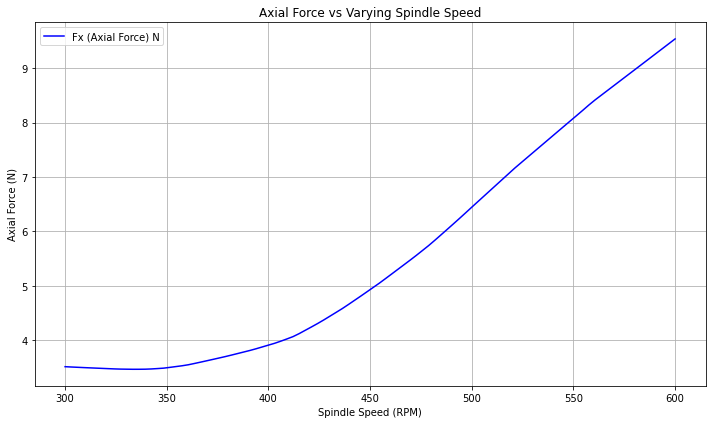

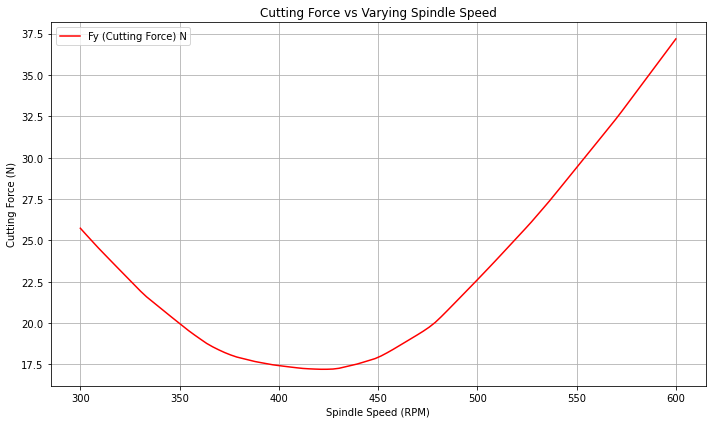

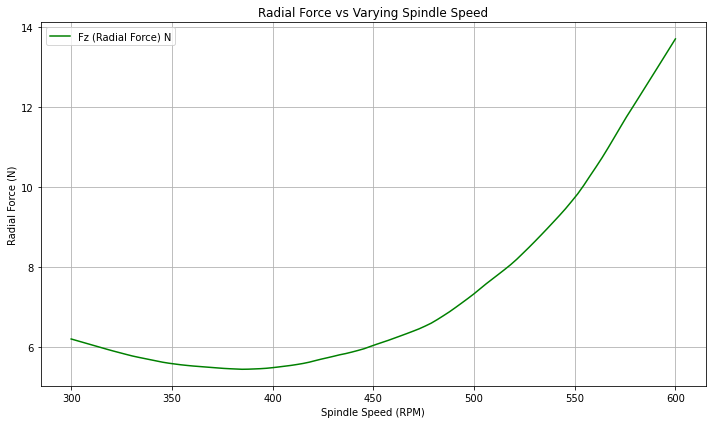

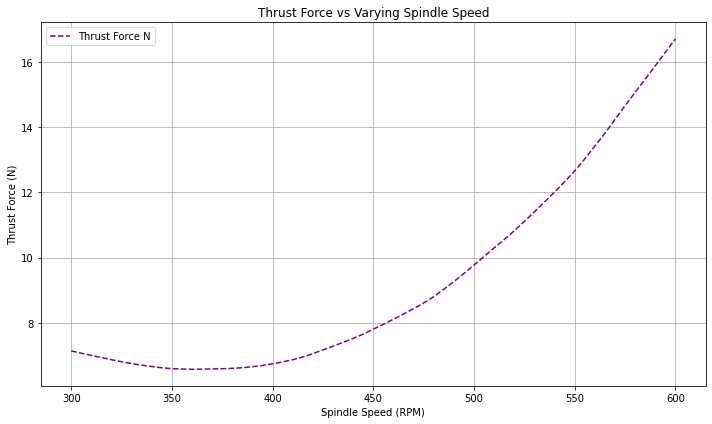

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming predict_new_input is already defined and returns a list of predictions [Fx, Fy, Fz]

# Varying Spindle Speed (300 to 600) while keeping Feed (0.3) and Depth of Cut (0.4) constant
spindle_speeds = np.linspace(300, 600, 100)
feed_const = 0.3
doc_const = 0.4

fx_preds_speed = []
fy_preds_speed = []
fz_preds_speed = []
thrust_force_speed = []

for speed in spindle_speeds:
    p = predict_new_input([speed, feed_const, doc_const])
    fx_preds_speed.append(p[0])  # Axial Cutting Force
    fy_preds_speed.append(p[1])  # Tangential Cutting Force
    fz_preds_speed.append(p[2])  # Radial Cutting Force
    thrust_force_speed.append(np.sqrt(p[0]**2 + p[2]**2))  # Calculate thrust force

# Plot Axial Cutting Force
plt.figure(figsize=(10, 6))
plt.plot(spindle_speeds, fx_preds_speed, label='Fx (Axial Force) N', color='blue')
plt.xlabel('Spindle Speed (RPM)')
plt.ylabel('Axial Force (N)')
plt.title('Axial Force vs Varying Spindle Speed')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Tangential Cutting Force
plt.figure(figsize=(10, 6))
plt.plot(spindle_speeds, fy_preds_speed, label='Fy (Cutting Force) N', color='red')
plt.xlabel('Spindle Speed (RPM)')
plt.ylabel('Cutting Force (N)')
plt.title('Cutting Force vs Varying Spindle Speed')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Radial Cutting Force
plt.figure(figsize=(10, 6))
plt.plot(spindle_speeds, fz_preds_speed, label='Fz (Radial Force) N', color='green')
plt.xlabel('Spindle Speed (RPM)')
plt.ylabel('Radial Force (N)')
plt.title('Radial Force vs Varying Spindle Speed')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Thrust Force
plt.figure(figsize=(10, 6))
plt.plot(spindle_speeds, thrust_force_speed, label='Thrust Force N', color='purple', linestyle='--')
plt.xlabel('Spindle Speed (RPM)')
plt.ylabel('Thrust Force (N)')
plt.title('Thrust Force vs Varying Spindle Speed')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


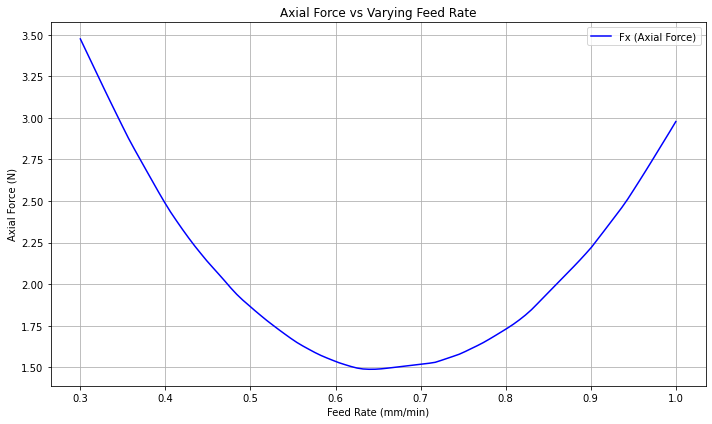

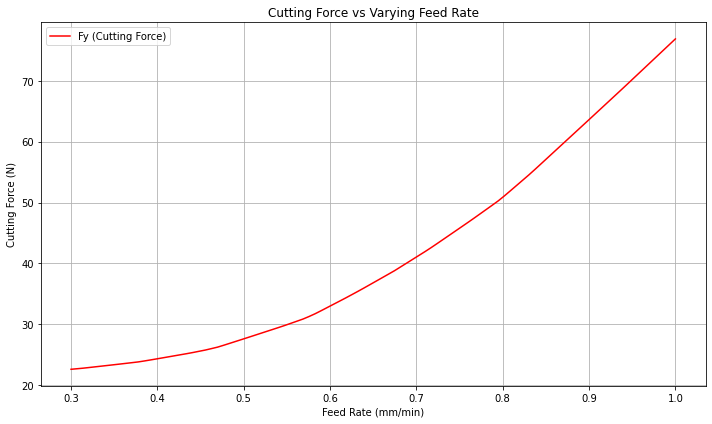

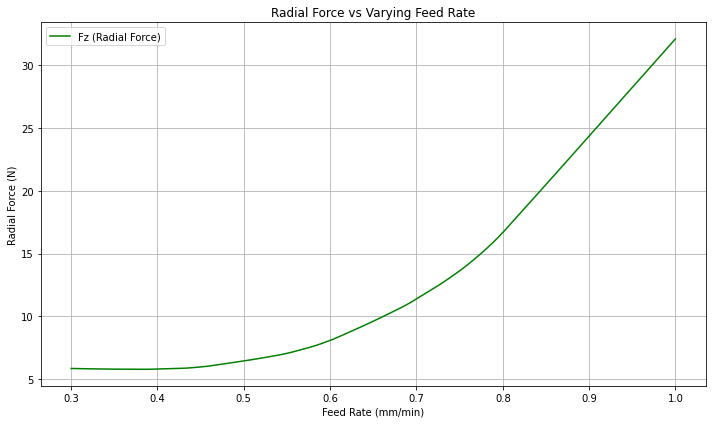

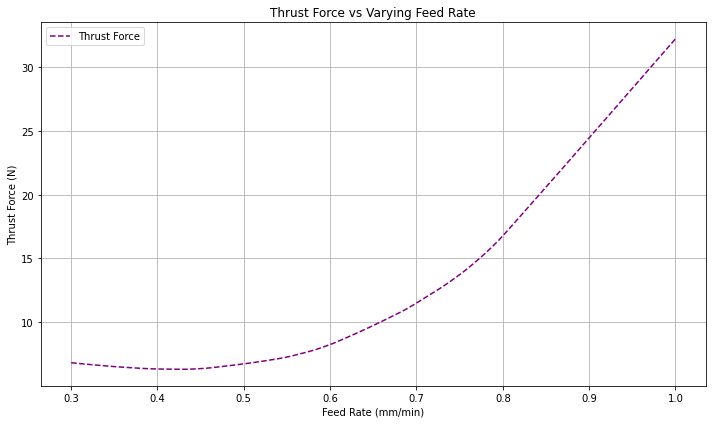

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Varying Feed (0.3 to 1) while keeping Spindle Speed (325) and Depth of Cut (0.4) constant
feed_rates = np.linspace(0.3, 1, 100)
speed_const = 325
doc_const = 0.4

fx_preds_feed = []
fy_preds_feed = []
fz_preds_feed = []
thrust_force_feed = []

for feed in feed_rates:
    p = predict_new_input([speed_const, feed, doc_const])
    fx_preds_feed.append(p[0])  # Axial Cutting Force
    fy_preds_feed.append(p[1])  # Tangential Cutting Force
    fz_preds_feed.append(p[2])  # Radial Cutting Force
    thrust_force_feed.append(np.sqrt(p[0]**2 + p[2]**2))  # Calculate thrust force

# Plot Axial Cutting Force
plt.figure(figsize=(10, 6))
plt.plot(feed_rates, fx_preds_feed, label='Fx (Axial Force)', color='blue')
plt.xlabel('Feed Rate (mm/min)')
plt.ylabel('Axial Force (N)')
plt.title('Axial Force vs Varying Feed Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Tangential Cutting Force
plt.figure(figsize=(10, 6))
plt.plot(feed_rates, fy_preds_feed, label='Fy (Cutting Force)', color='red')
plt.xlabel('Feed Rate (mm/min)')
plt.ylabel('Cutting Force (N)')
plt.title('Cutting Force vs Varying Feed Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Radial Cutting Force
plt.figure(figsize=(10, 6))
plt.plot(feed_rates, fz_preds_feed, label='Fz (Radial Force)', color='green')
plt.xlabel('Feed Rate (mm/min)')
plt.ylabel('Radial Force (N)')
plt.title('Radial Force vs Varying Feed Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Thrust Force
plt.figure(figsize=(10, 6))
plt.plot(feed_rates, thrust_force_feed, label='Thrust Force', color='purple', linestyle='--')
plt.xlabel('Feed Rate (mm/min)')
plt.ylabel('Thrust Force (N)')
plt.title('Thrust Force vs Varying Feed Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


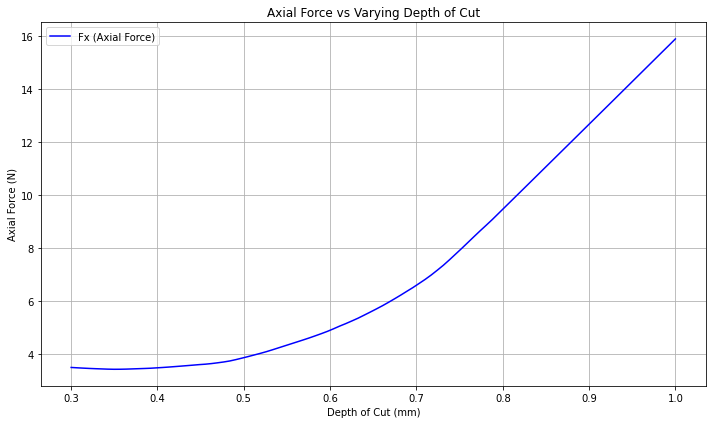

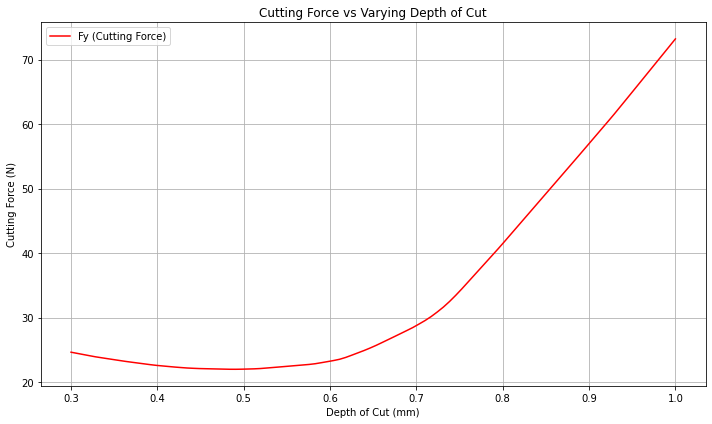

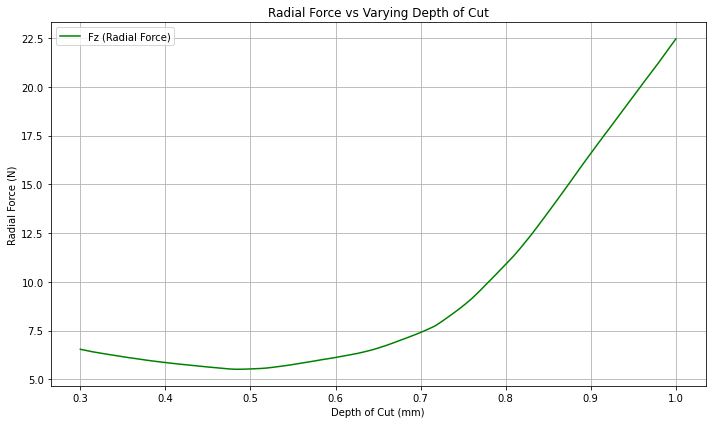

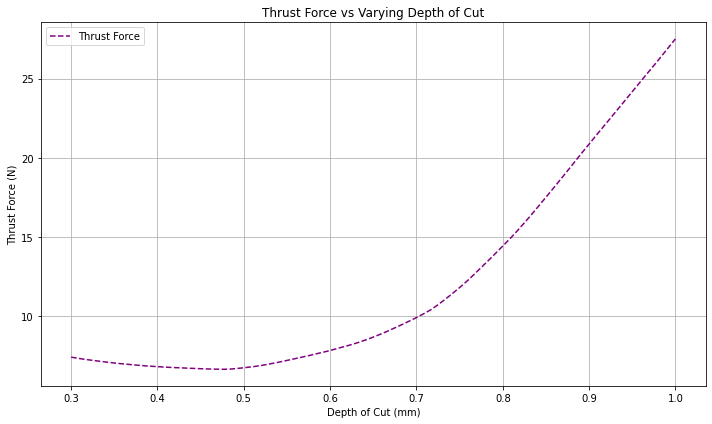

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Varying Depth of Cut (0.3 to 1) while keeping Spindle Speed (325) and Feed (0.3) constant
doc_rates = np.linspace(0.3, 1, 100)
speed_const = 325
feed_const = 0.3

fx_preds_doc = []
fy_preds_doc = []
fz_preds_doc = []
thrust_force_doc = []

for doc in doc_rates:
    p = predict_new_input([speed_const, feed_const, doc])
    fx_preds_doc.append(p[0])  # Axial Cutting Force
    fy_preds_doc.append(p[1])  # Tangential Cutting Force
    fz_preds_doc.append(p[2])  # Radial Cutting Force
    thrust_force_doc.append(np.sqrt(p[0]**2 + p[2]**2))  # Calculate thrust force

# Plot Axial Cutting Force
plt.figure(figsize=(10, 6))
plt.plot(doc_rates, fx_preds_doc, label='Fx (Axial Force)', color='blue')
plt.xlabel('Depth of Cut (mm)')
plt.ylabel('Axial Force (N)')
plt.title('Axial Force vs Varying Depth of Cut')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Tangential Cutting Force
plt.figure(figsize=(10, 6))
plt.plot(doc_rates, fy_preds_doc, label='Fy (Cutting Force)', color='red')
plt.xlabel('Depth of Cut (mm)')
plt.ylabel('Cutting Force (N)')
plt.title('Cutting Force vs Varying Depth of Cut')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Radial Cutting Force
plt.figure(figsize=(10, 6))
plt.plot(doc_rates, fz_preds_doc, label='Fz (Radial Force)', color='green')
plt.xlabel('Depth of Cut (mm)')
plt.ylabel('Radial Force (N)')
plt.title('Radial Force vs Varying Depth of Cut')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Thrust Force
plt.figure(figsize=(10, 6))
plt.plot(doc_rates, thrust_force_doc, label='Thrust Force', color='purple', linestyle='--')
plt.xlabel('Depth of Cut (mm)')
plt.ylabel('Thrust Force (N)')
plt.title('Thrust Force vs Varying Depth of Cut')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
